# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [163]:
import json
from pandas.io.json import json_normalize

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [165]:
# load as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


## Approach 1 for Q1: Find the 10 countries with the most projects

In [166]:
#Approach 1 for Q1: Find the 10 countries with the most projects
#
#Group df by countryname and calculate # of projects for each country
df1 = df.groupby('countryname').size()

#Sort values in descending order
df1 = df1.sort_values(ascending=False)

#Print 10 countries with the most projects
print(df1.head(10))

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64


## Approach 2 for Q1: Find the 10 countries with the most projects

In [167]:
#Calculate frequency of occurence of each countryname since each row = 1 project
df1 = df.countryname.value_counts()

#Print 10 countries with the most projects
print(df1.head(10))

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


### Plot results for Q1

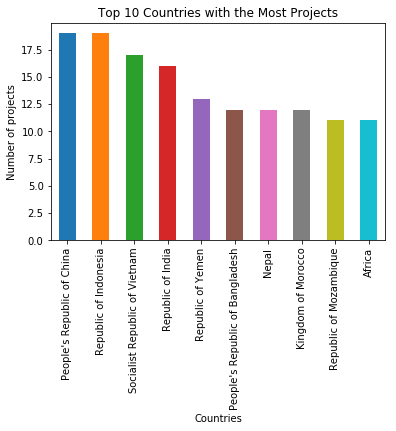

In [168]:
#Plot top 10 countries
df1.head(10).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Number of projects')
plt.title('Top 10 Countries with the Most Projects')
plt.show()

## Q2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [169]:
#Split theme_namecode column into multiple columns
df2 = df.mjtheme_namecode.apply(pd.Series)

#Move columns back down into rows with stack, returns series
df2 = df2.stack()

#Remove multi-index (in thise case, remove level 1 index)
df2 = df2.reset_index(level=1,drop=True)

#Convert series back to dataframe
df2 = df2.to_frame('mjtheme_namecode2')

#Optional: Merge dataframe to existing dataframe, dropping the original theme_namecode column
df_merged = pd.merge(df,df2,left_index=True,right_index=True).drop(['mjtheme_namecode'],axis=1)

#Calculate frequency of each project theme
major_themes = df_merged['mjtheme_namecode2'].value_counts()

#Return the 10 most common themes
print(major_themes.head(10))

{'code': '11', 'name': 'Environment and natural resources management'}    223
{'code': '10', 'name': 'Rural development'}                               202
{'code': '8', 'name': 'Human development'}                                197
{'code': '2', 'name': 'Public sector governance'}                         184
{'code': '6', 'name': 'Social protection and risk management'}            158
{'code': '4', 'name': 'Financial and private sector development'}         130
{'code': '7', 'name': 'Social dev/gender/inclusion'}                      119
{'code': '5', 'name': 'Trade and integration'}                             72
{'code': '9', 'name': 'Urban development'}                                 47
{'code': '1', 'name': 'Economic management'}                               33
Name: mjtheme_namecode2, dtype: int64


### Plot results for Q2

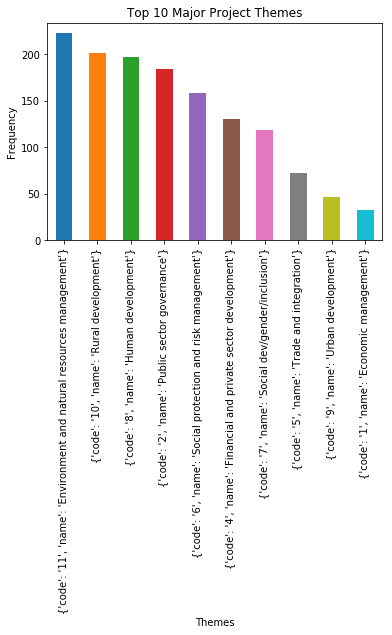

In [170]:
#Plot top 10 major project themes
major_themes.head(10).plot(kind='bar')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.title('Top 10 Major Project Themes')
plt.show()

## Question 3: Some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.


In [171]:
#Split mjtheme_namecode2 column into separate columns with dictionary keys('name','code') as column headers
df3 = df_merged['mjtheme_namecode2'].apply(pd.Series)

#Sort df3 by 'code' and replace all blanks in column 'name' with NaN
df3 = df3.sort_values('code').replace({'name': {'': np.nan}})

#Forward fill 'names' to eliminate missing values
df3.name = df3.name.fillna(method='ffill')

#Merge 'code' and 'name' into new column 'mjtheme_namecode' as a dictionary
df3['mjtheme_namecode'] = df3.apply(lambda row: {'code': row['code'],'name': row['name']}, axis=1)

#Drop redundant columns and sort by index
df3 = df3.drop(['code','name'],axis=1).sort_index()

#Group rows of same index together and combine mjtheme_namecode entries to list for each group
df3 = df3.groupby(df3.index).agg(lambda x: x.tolist())

#Drop duplicates in original dataset and drop original mjtheme_namecode2 column
original = df_merged.drop(['mjtheme_namecode2'],axis=1).drop_duplicates(subset='url')

#Merge df3 to original dataset
final = pd.concat([original,df3],axis=1)

#print final
final

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url,mjtheme_namecode
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...,"[{'code': '8', 'name': 'Human development'}, {..."
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en,"[{'code': '1', 'name': 'Economic management'},..."
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en,"[{'code': '2', 'name': 'Public sector governan..."
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en,"[{'code': '7', 'name': 'Social dev/gender/incl..."
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...,"[{'code': '5', 'name': 'Trade and integration'..."
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en,"[{'code': '6', 'name': 'Social protection and ..."
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...,"[{'code': '2', 'name': 'Public sector governan..."
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...,"[{'code': '8', 'name': 'Human development'}, {..."
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...,"[{'code': '7', 'name': 'Social dev/gender/incl..."
9,{'$oid': '52b213b38594d8a2be17c